# Packages Used
* `numpy` : It provides support for large, multi-dimensional arrays and matrices
* `pandas` : It provides easy-to-use data structures and data analysis tools, making it a fundamental tool in the field of data science and data analysis.
* `matplotlib.pyplot` : It contains functions makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



* This means they are generated deterministically based on an initial "seed" value
* We will get the same sequence of random numbers every time.

In [2]:
np.random.seed(10)

In [3]:
number_customer=int(input("please enter number of customers : "))

please enter number of customers : 100


In [4]:
interarrival_time_list=[]
cumm_time=0
cummulative=0
size_interval=0

Average_waiting_time=[]
probability_wait=[]
probability_idle_server=[]
Average_service_time=[]
average_time_between_arrivals=[]
Average_waiting_time_of_those_who_wait=[]
Average_time_customer_spend_in_system=[]

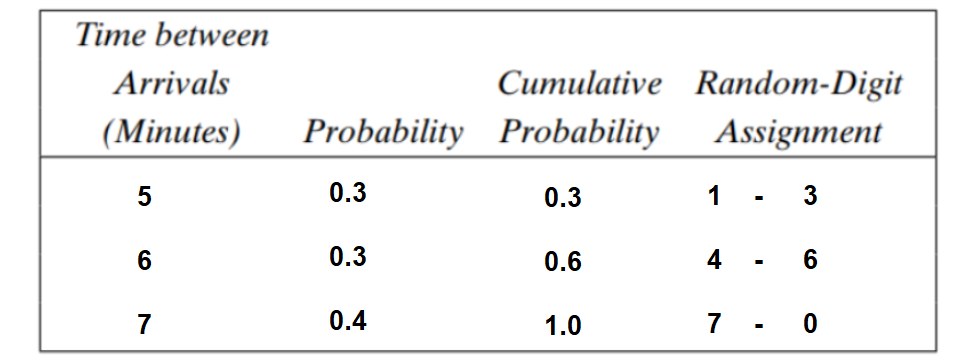

In [5]:
interarrival_time_list = []
cumm_time = 0
end_prob = 0
size_interval = 0
cummulative=0

Server1_busy = []
Server2_busy = []
Waiting_time = []
probability_Waiting_time = [0]

number_probability=int(input("enter number of probapility of interarrival time : "))
for i in range(number_probability):
    while True:
        try:
            inter_time = int(input(f'Enter interarrival time of {i+1}: '))
            probability = float(input(f'Enter probability of {i+1}: '))

            if probability < 0 or probability > 1:
                print("Probability must be between 0 and 1")
                continue

            if float(cummulative) + probability > 1:
                print("The sum of probabilities cannot exceed 1. Please enter a lower probability.")
                continue

            cummulative += probability

            end = end_prob
            end_prob = int(str(cummulative).split('.')[1])

            if size_interval < len(str(end_prob)):
                size_interval = len(str(end_prob))

            Random_digit_assignment = [1 + end, end_prob]
            interarrival_time_list.append([inter_time, probability, cummulative, Random_digit_assignment])

            break
        except ValueError:
            print("Please enter a valid number.")


enter number of probapility of interarrival time : 3
Enter interarrival time of 1: 5
Enter probability of 1: 0.3
Enter interarrival time of 2: 6
Enter probability of 2: 0.3
Enter interarrival time of 3: 7
Enter probability of 3: 0.4


In [6]:
interarrival_time_list=np.array(interarrival_time_list,dtype=object)
interarrival_time_list

array([[5, 0.3, 0.3, list([1, 3])],
       [6, 0.3, 0.6, list([4, 6])],
       [7, 0.4, 1.0, list([7, 0])]], dtype=object)

# Repeat last steps about services time  
* Generate services time list
* Create empty array has the same size of services list
* Put services list into array then convert them into array

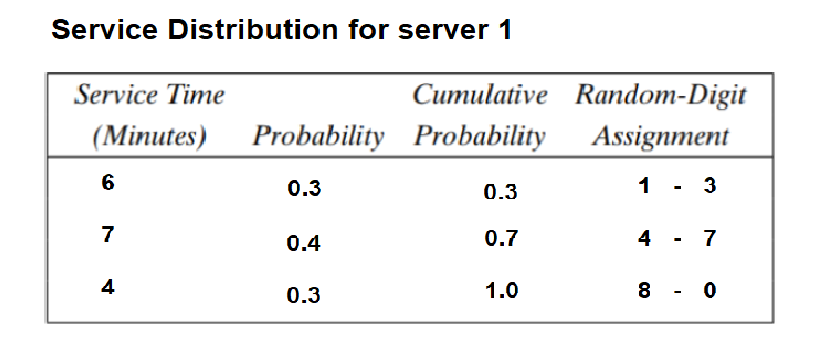

In [7]:

cummulative=0
end_prob=0
services_time_list_s1=[]
size_service=0
number_probability_1=int(input("enter number of probapility of service time : "))
for i in range(number_probability_1):
    while True:
        try:
            service_time = int(input(f'Enter service time of {i+1}: '))
            probability = float(input(f'Enter probability of {i+1}: '))

            if probability < 0 or probability > 1:
                print("Probability must be between 0 and 1")
                continue

            if float(cummulative) + probability > 1:
                print("The sum of probabilities cannot exceed 1. Please enter a lower probability.")
                continue

            cummulative += probability

            end = end_prob
            end_prob = int(str(cummulative).split('.')[1])

            if size_service < len(str(end_prob)):
                size_service = len(str(end_prob))

            Random_digit_assignment = [1 + end, end_prob]
            services_time_list_s1.append([service_time, probability, cummulative, Random_digit_assignment])

            break
        except ValueError:
            print("Please enter a valid number.")


enter number of probapility of service time : 3
Enter service time of 1: 6
Enter probability of 1: 0.3
Enter service time of 2: 7
Enter probability of 2: 0.4
Enter service time of 3: 4
Enter probability of 3: 0.3


In [8]:
services_time_list_s1=np.array(services_time_list_s1,dtype=object)
services_time_list_s1

array([[6, 0.3, 0.3, list([1, 3])],
       [7, 0.4, 0.7, list([4, 7])],
       [4, 0.3, 1.0, list([8, 0])]], dtype=object)

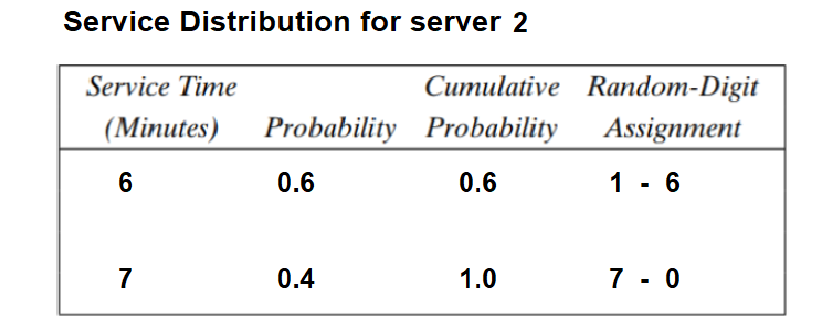

In [9]:
cumm_time=0
cummulative=0
end_prob=0
services_time_list_s2=[]
size_service=0
number_probability_2=int(input("enter number of probapility of service time : "))
for i in range(number_probability_2):
    while True:
        try:
            service_time = int(input(f'Enter service time of {i+1}: '))
            probability = float(input(f'Enter probability of {i+1}: '))

            if probability < 0 or probability > 1:
                print("Probability must be between 0 and 1")
                continue

            if float(cummulative) + probability > 1:
                print("The sum of probabilities cannot exceed 1. Please enter a lower probability.")
                continue

            cummulative += probability

            end = end_prob
            end_prob = int(str(cummulative).split('.')[1])

            if size_service < len(str(end_prob)):
                size_service = len(str(end_prob))

            Random_digit_assignment = [1 + end, end_prob]
            services_time_list_s2.append([service_time, probability, cummulative, Random_digit_assignment])

            break
        except ValueError:
            print("Please enter a valid number.")

enter number of probapility of service time : 2
Enter service time of 1: 6
Enter probability of 1: 0.6
Enter service time of 2: 7
Enter probability of 2: 0.4


In [10]:
services_time_list_s2=np.array(services_time_list_s2,dtype=object)
services_time_list_s2

array([[6, 0.6, 0.6, list([1, 6])],
       [7, 0.4, 1.0, list([7, 0])]], dtype=object)

# Number of iteration 100

In [11]:
iteration=int(input("enter number of iterations : "))

enter number of iterations : 100


In [12]:
time_between_arrivals=np.zeros((number_customer,3),dtype='int32')
for i in range(1,number_customer):
        time_between_arrivals[i][0]=i
        rand=np.random.randint(0,10**size_interval)
        time_between_arrivals[i][1]=rand
        for j in range(number_probability-1):
            if interarrival_time_list[j][3][0] <= rand <= interarrival_time_list[j][3][1] :
                time_between_arrivals[i][2]=interarrival_time_list[j][0]
                break
        else :
            time_between_arrivals[i][2]=interarrival_time_list[j+1][0]
                    

In [13]:
time_between_arrivals

array([[ 0,  0,  0],
       [ 1,  9,  7],
       [ 2,  4,  6],
       [ 3,  0,  7],
       [ 4,  1,  5],
       [ 5,  9,  7],
       [ 6,  0,  7],
       [ 7,  1,  5],
       [ 8,  8,  7],
       [ 9,  9,  7],
       [10,  0,  7],
       [11,  8,  7],
       [12,  6,  6],
       [13,  4,  6],
       [14,  3,  5],
       [15,  0,  7],
       [16,  4,  6],
       [17,  6,  6],
       [18,  8,  7],
       [19,  1,  5],
       [20,  8,  7],
       [21,  4,  6],
       [22,  1,  5],
       [23,  3,  5],
       [24,  6,  6],
       [25,  5,  6],
       [26,  3,  5],
       [27,  9,  7],
       [28,  6,  6],
       [29,  9,  7],
       [30,  1,  5],
       [31,  9,  7],
       [32,  4,  6],
       [33,  2,  5],
       [34,  6,  6],
       [35,  7,  7],
       [36,  8,  7],
       [37,  8,  7],
       [38,  9,  7],
       [39,  2,  5],
       [40,  0,  7],
       [41,  6,  6],
       [42,  7,  7],
       [43,  8,  7],
       [44,  1,  5],
       [45,  7,  7],
       [46,  1,  5],
       [47,  

In [14]:

       
while iteration > 0 :
    time_between_arrivals=np.zeros((number_customer,3),dtype='int32')
    for i in range(1,number_customer):
        time_between_arrivals[i][0]=i
        rand=np.random.randint(0,10**size_interval)
        time_between_arrivals[i][1]=rand
        for j in range(number_probability-1):
            if interarrival_time_list[j][3][0] <= rand <= interarrival_time_list[j][3][1] :
                time_between_arrivals[i][2]=interarrival_time_list[j][0]
                break
        else :
            time_between_arrivals[i][2]=interarrival_time_list[j+1][0]
                    
      
    
    
    solution=np.zeros((number_customer,10))
    time_service=np.zeros((number_customer,3))
    
    m,n=0,0
    for i in range(number_customer):

        solution[i][0]=i
        solution[i][1]=time_between_arrivals[i][2]
        solution[i][2]=solution[i][1] + solution[i-1][2]
        if i == 0:
            
            time_service[i][0]=i
            rand=np.random.randint(0,10**size_service)
            time_service[i][1]=rand
            for j in range(number_probability_1 - 1):
                if services_time_list_s1[j][3][0] <= rand <= services_time_list_s1[j][3][1] :
                    time_service[i][2]=services_time_list_s1[j][0]
                    break
            else :
                time_service[i][2]=services_time_list_s1[j+1][0]
                
            
            solution[m][3]=0
            solution[m][4]=time_service[m][2]
            solution[m][5]=time_service[m][2]
            m = i
            n = i
        elif solution[i][2] < solution[m][5] and solution[i][2] >= solution[n][8] :
            
            time_service[i][0]=i
            rand=np.random.randint(0,10**size_service)
            time_service[i][1]=rand
            for j in range(number_probability_2-1):
                if services_time_list_s2[j][3][0] <= rand <= services_time_list_s2[j][3][1] :
                    time_service[i][2]=services_time_list_s2[j][0]
                    break
            else :
                time_service[i][2]=services_time_list_s2[j+1][0]
                
            if solution[m][6] > solution[i][2]:
                solution[i][6]=solution[n][8]
            else:
                solution[i][6]=solution[i][2]
            solution[i][7]=time_service[i][2]
            solution[i][8]=solution[i][6] + solution[i][7]
            n=i
            if solution[i][2] - solution[n][8] > 0:
                solution[i][9]=solution[i][2] - solution[n][8]
            
        elif solution[i][2] >= solution[m][5] or solution[i][2] < solution[n][8]:
            
            
            time_service[i][0]=i
            rand=np.random.randint(0,10**size_service)
            time_service[i][1]=rand
            for j in range(number_probability_1-1):
                if services_time_list_s1[j][3][0] <= rand <= services_time_list_s1[j][3][1] :
                    time_service[i][2]=services_time_list_s1[j][0]
                    break
            else :
                time_service[i][2]=services_time_list_s1[j+1][0]
            
            if solution[m][5] < solution[i][2] :
                solution[i][3]=solution[i][2]
            else :
                solution[i][3]=solution[m][5]
            solution[i][4]=time_service[i][2]
            solution[i][5]=solution[i][3] + solution[i][4]
            m=i
            if solution[i][2] - solution[m][5] > 0:
                solution[i][9]=solution[i][2] - solution[m][5]
                
            
    iteration = iteration - 1
    df=pd.DataFrame(solution[:,1:],columns=['interrival time','arrival time',
                                            'the service begin S1',
                                            'the service time S1',
                                            'the service end S1',
                                            'the service begin S2',
                                            'the service time S2',
                                            'the service end S2',
                                            'waiting in queue'])
    
    
    
    Server1_busy.append(df['the service time S1'].sum()/solution[m][5])
    
    Server2_busy.append(df['the service time S2'].sum()/solution[n][8])
    
    Waiting_time.append(df['waiting in queue'].sum()/number_customer)
    
    probability_Waiting_time.append(df['waiting in queue'][df['waiting in queue']>0].count()/number_customer)
   
    



In [15]:
df

,interrival time,arrival time,the service begin S1,the service time S1,the service end S1,the service begin S2,the service time S2,the service end S2,waiting in queue
0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0
1,5.0,5.0,0.0,0.0,0.0,5.0,6.0,11.0,0.0
2,7.0,12.0,12.0,7.0,19.0,0.0,0.0,0.0,0.0
3,6.0,18.0,0.0,0.0,0.0,18.0,7.0,25.0,0.0
4,5.0,23.0,23.0,4.0,27.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,6.0,568.0,568.0,4.0,572.0,0.0,0.0,0.0,0.0
96,7.0,575.0,575.0,4.0,579.0,0.0,0.0,0.0,0.0
97,7.0,582.0,582.0,7.0,589.0,0.0,0.0,0.0,0.0
98,6.0,588.0,0.0,0.0,0.0,588.0,7.0,595.0,0.0


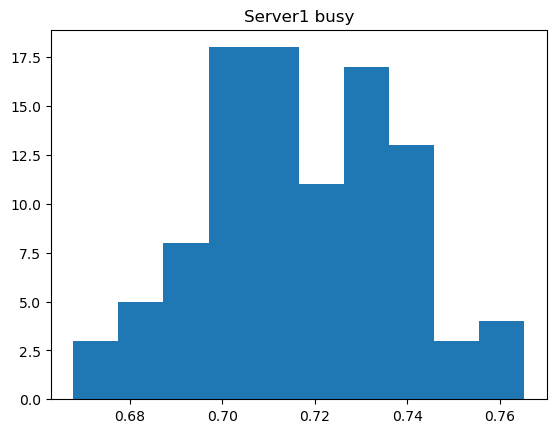

In [16]:

plt.hist(Server1_busy)
plt.title('Server1 busy')
plt.show()


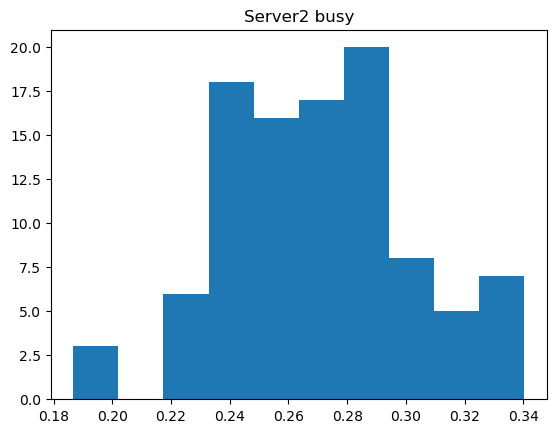

In [18]:
plt.hist(Server2_busy)
plt.title('Server2 busy')
plt.show()

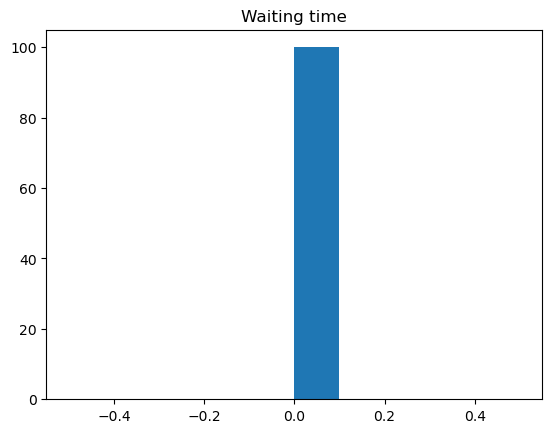

In [19]:
plt.hist(Waiting_time)
plt.title('Waiting time')
plt.show()

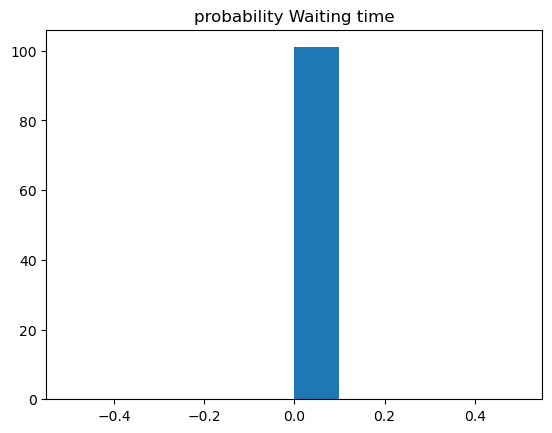

In [20]:

plt.hist(probability_Waiting_time)
plt.title('probability Waiting time')
plt.show()